#### Question 7.In what way DWT and CWT differ? Explain with an example of data?

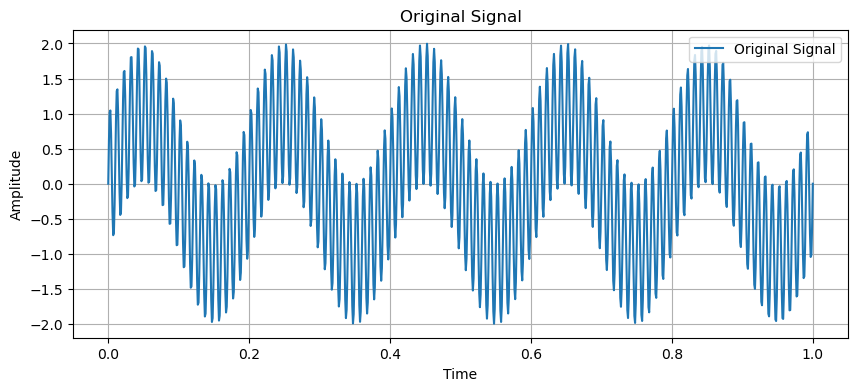

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Generate any signal
t = np.linspace(0, 1, 1000)
low_freq_signal = np.sin(2 * np.pi * 5 * t)  # Low-frequency component using n=5
high_freq_signal = np.sin(2 * np.pi * 100 * t)  # High-frequency component using n=100
signal = low_freq_signal + high_freq_signal

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.legend()
plt.grid(True)
plt.show()

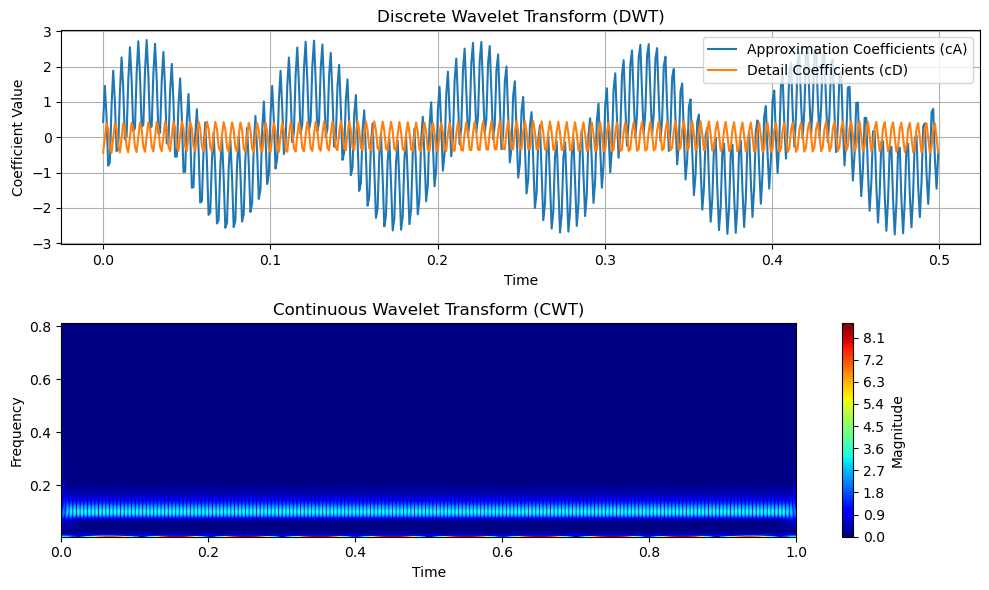

In [2]:
# Discrete Wavelet Transform (DWT)
coeffs = pywt.dwt(signal, 'db1')  # Perform DWT using Daubechies wavelet (db1)
cA, cD = coeffs  # Approximation (cA) and detail (cD) coefficients

# Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)  # Define scales for CWT
coeffs, freqs = pywt.cwt(signal, scales, 'morl')  # Perform CWT using Morlet wavelet

# Plot DWT coefficients
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:len(cA)], cA, label='Approximation Coefficients (cA)')
plt.plot(t[:len(cD)], cD, label='Detail Coefficients (cD)')
plt.xlabel('Time')
plt.ylabel('Coefficient Value')
plt.title('Discrete Wavelet Transform (DWT)')
plt.legend()
plt.grid(True)

# Plot CWT coefficients
plt.subplot(2, 1, 2)
plt.contourf(t, freqs, np.abs(coeffs), cmap='jet', levels=100)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Continuous Wavelet Transform (CWT)')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


#### Question 8.Plot the CWT of the monthly rainfall data for the grid that is near to your home town. Analyse and comment on the results

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
precipitation = pd.read_csv('data_23.50_80.50.csv') # Read the CSV file of rainfall data of lat=23.5 and lon=80.5
precipitation.head()

,DateTime,23.5 80.5
0,1950-01-01,0.0
1,1950-01-02,0.0
2,1950-01-03,0.0
3,1950-01-04,0.0
4,1950-01-05,0.0


In [3]:
# The DateTime is object type, create date range and set as index and dropping given DateTime

precipitation.drop('DateTime',axis=1,inplace=True) # inplace=true ensures dataframe is dropped that column
date_range_rain = pd.date_range(start='1950-01-01', end='2023-12-31', freq='D')
precipitation.index = date_range_rain
precipitation.head()

,23.5 80.5
1950-01-01,0.0
1950-01-02,0.0
1950-01-03,0.0
1950-01-04,0.0
1950-01-05,0.0


In [4]:
#Mann Kendall Test (for trend checking)
!pip install pymannkendall
import pymannkendall as pk

In [8]:
monthly_precip = precipitation.resample('M').sum()
#print(monthly_precip)

# Extract the monthly precipitation signal
monthly_signal = monthly_precip.values

monthly_signal = monthly_signal.squeeze()
#print(monthly_signal)


#Mann Kendall Test (for trend checking)
result = pk.original_test(monthly_signal)

# Print the result
print("MK Test Result:")
print(f"Trend: {result.trend}")
print(f"P-Value: {result.p}")

MK Test Result:
Trend: no trend
P-Value: 0.5048860424281403


###### Since there is no trend present in the monthly rainfall data, there is no use of detrending

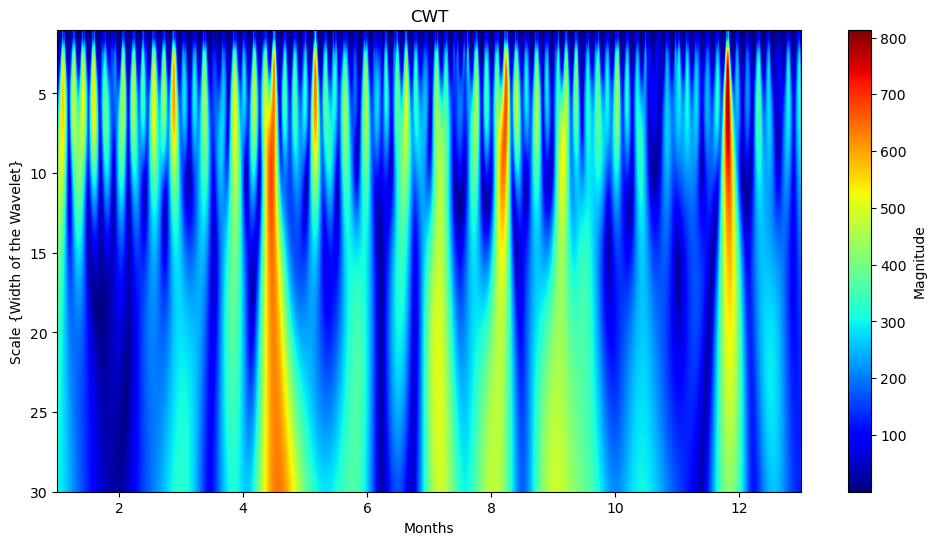

In [14]:
from scipy.signal import cwt, morlet

# Define the range of scales for the CWT
widths = np.arange(1, 31)

# Apply Continuous Wavelet Transform (CWT) using Morlet wavelet
cwt_result = cwt(monthly_signal, morlet, widths)

# Visualize the CWT coefficients
plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwt_result), aspect='auto', extent=[1, 13, widths[-1], widths[0]], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('CWT')
plt.xlabel('Months')
plt.ylabel('Scale {Width of the Wavelet}')
plt.show()

In [12]:
mean_rainfall_monthly = precipitation.resample('M').mean()

monthly_signal_mean = mean_rainfall_monthly.values

monthly_signal_mean = monthly_signal_mean.squeeze()

#Mann Kendall Test to check for trend in the data
result = pk.original_test(monthly_signal_mean)

# Print the result
print("MK Test Result:")
print(f"Trend: {result.trend}")
print(f"P-Value: {result.p}")

MK Test Result:
Trend: no trend
P-Value: 0.5001718217757767


##### Since there is no trend present in the mean of monthly rainfall data, there is no use of detrending

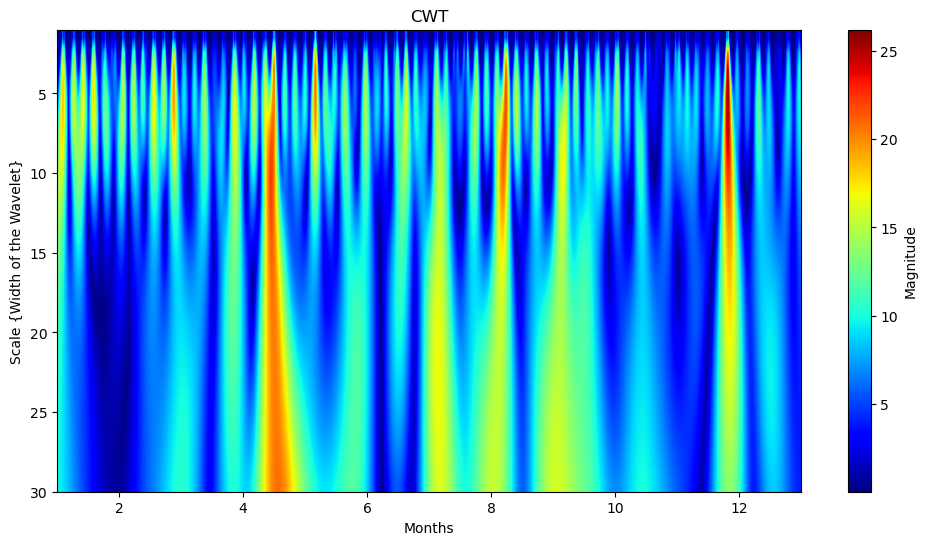

In [15]:
widths = np.arange(1, 31)


cwt_result = cwt(monthly_signal_mean, morlet, widths)

plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwt_result), aspect='auto', extent=[1, 13, widths[-1], widths[0]], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('CWT')
plt.xlabel('Months')
plt.ylabel('Scale {Width of the Wavelet}')
plt.show()

#### There is a strong seasonal cycle in the rainfall data, with higher power values in the winter months (around December to February) and weaker power values in the summer months (around June to August). This indicates that there is more variation in the amount of rainfall during the winter months compared to the summer months.

#### Question 9.Plot the CWT of the extreme rainfall (max daily rainfall) from each year and compare the results with the previous questions’ results

In [20]:
max_daily_rainfall_yearwise = precipitation.resample('Y').max()

max_daily_rainfall_yearwise = max_daily_rainfall_yearwise.values

max_rainfall = max_daily_rainfall_yearwise.squeeze()

#Mann Kendall Test to check for trend in the data
result = pk.original_test(max_rainfall)

# Print the result
print("MK Test Result:")
print(f"Trend: {result.trend}")
print(f"P-Value: {result.p}")

MK Test Result:
Trend: no trend
P-Value: 0.24712916241404015


##### Since there is no trend present in the mean of monthly rainfall data, there is no use of detrending

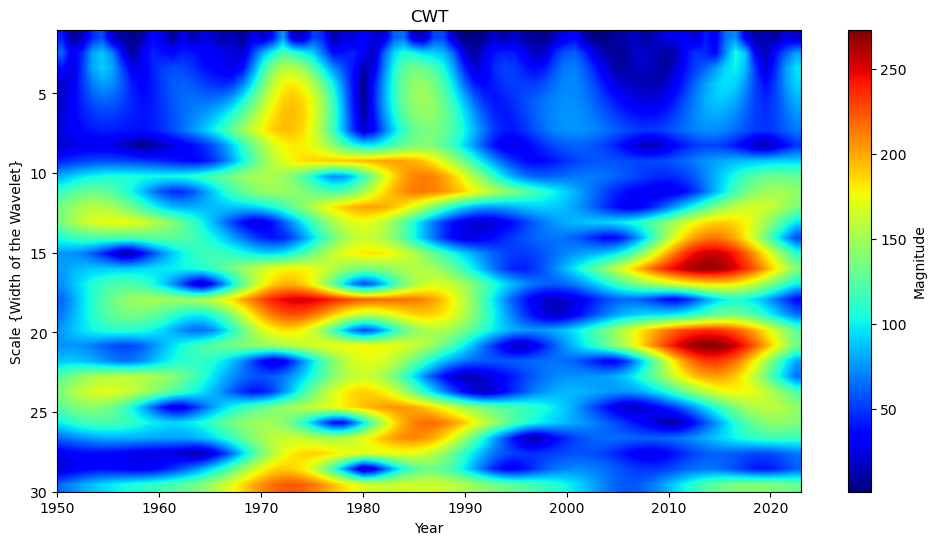

In [37]:
widths = np.arange(1,31)


cwt_result = cwt(max_rainfall, morlet, widths)

plt.figure(figsize=(12, 6))
plt.imshow(np.abs(cwt_result), aspect='auto', extent=[precipitation.index[0].year, precipitation.index[-1].year, widths[-1], widths[0]], cmap='jet', interpolation='bilinear')
plt.colorbar(label='Magnitude')
plt.title('CWT')
plt.xlabel('Year')
plt.ylabel('Scale {Width of the Wavelet}')
plt.show()

#### The presence of yellow and red bands at various scales throughout the time series indicates interdecadal variability in the rainfall data. This means that the amount of rainfall can fluctuate over periods of several years.

#### Question 10.Take Nino 3.4 index from internet and perform WT analysis and analyse the results.

In [29]:
df_nino34 = pd.read_csv("nino34_long.csv")
df_nino34.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1870,25.58,25.57,26.43,26.96,26.59,26.61,26.19,25.99,26.22,25.82,25.86,25.79
1,1871,26.33,26.18,26.83,27.27,27.16,27.16,26.62,26.54,26.51,26.40,26.35,26.01
2,1872,25.86,26.14,26.76,27.00,27.25,27.16,26.91,26.02,25.73,25.79,25.86,25.71
3,1873,25.79,25.75,25.95,27.10,27.33,27.21,26.65,26.48,26.41,25.96,25.88,25.89
4,1874,25.64,25.70,25.85,26.83,27.00,26.96,26.22,25.82,25.62,25.49,25.33,25.45


In [30]:
df_nino34.head()

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1870,25.58,25.57,26.43,26.96,26.59,26.61,26.19,25.99,26.22,25.82,25.86,25.79
1,1871,26.33,26.18,26.83,27.27,27.16,27.16,26.62,26.54,26.51,26.40,26.35,26.01
2,1872,25.86,26.14,26.76,27.00,27.25,27.16,26.91,26.02,25.73,25.79,25.86,25.71
3,1873,25.79,25.75,25.95,27.10,27.33,27.21,26.65,26.48,26.41,25.96,25.88,25.89
4,1874,25.64,25.70,25.85,26.83,27.00,26.96,26.22,25.82,25.62,25.49,25.33,25.45


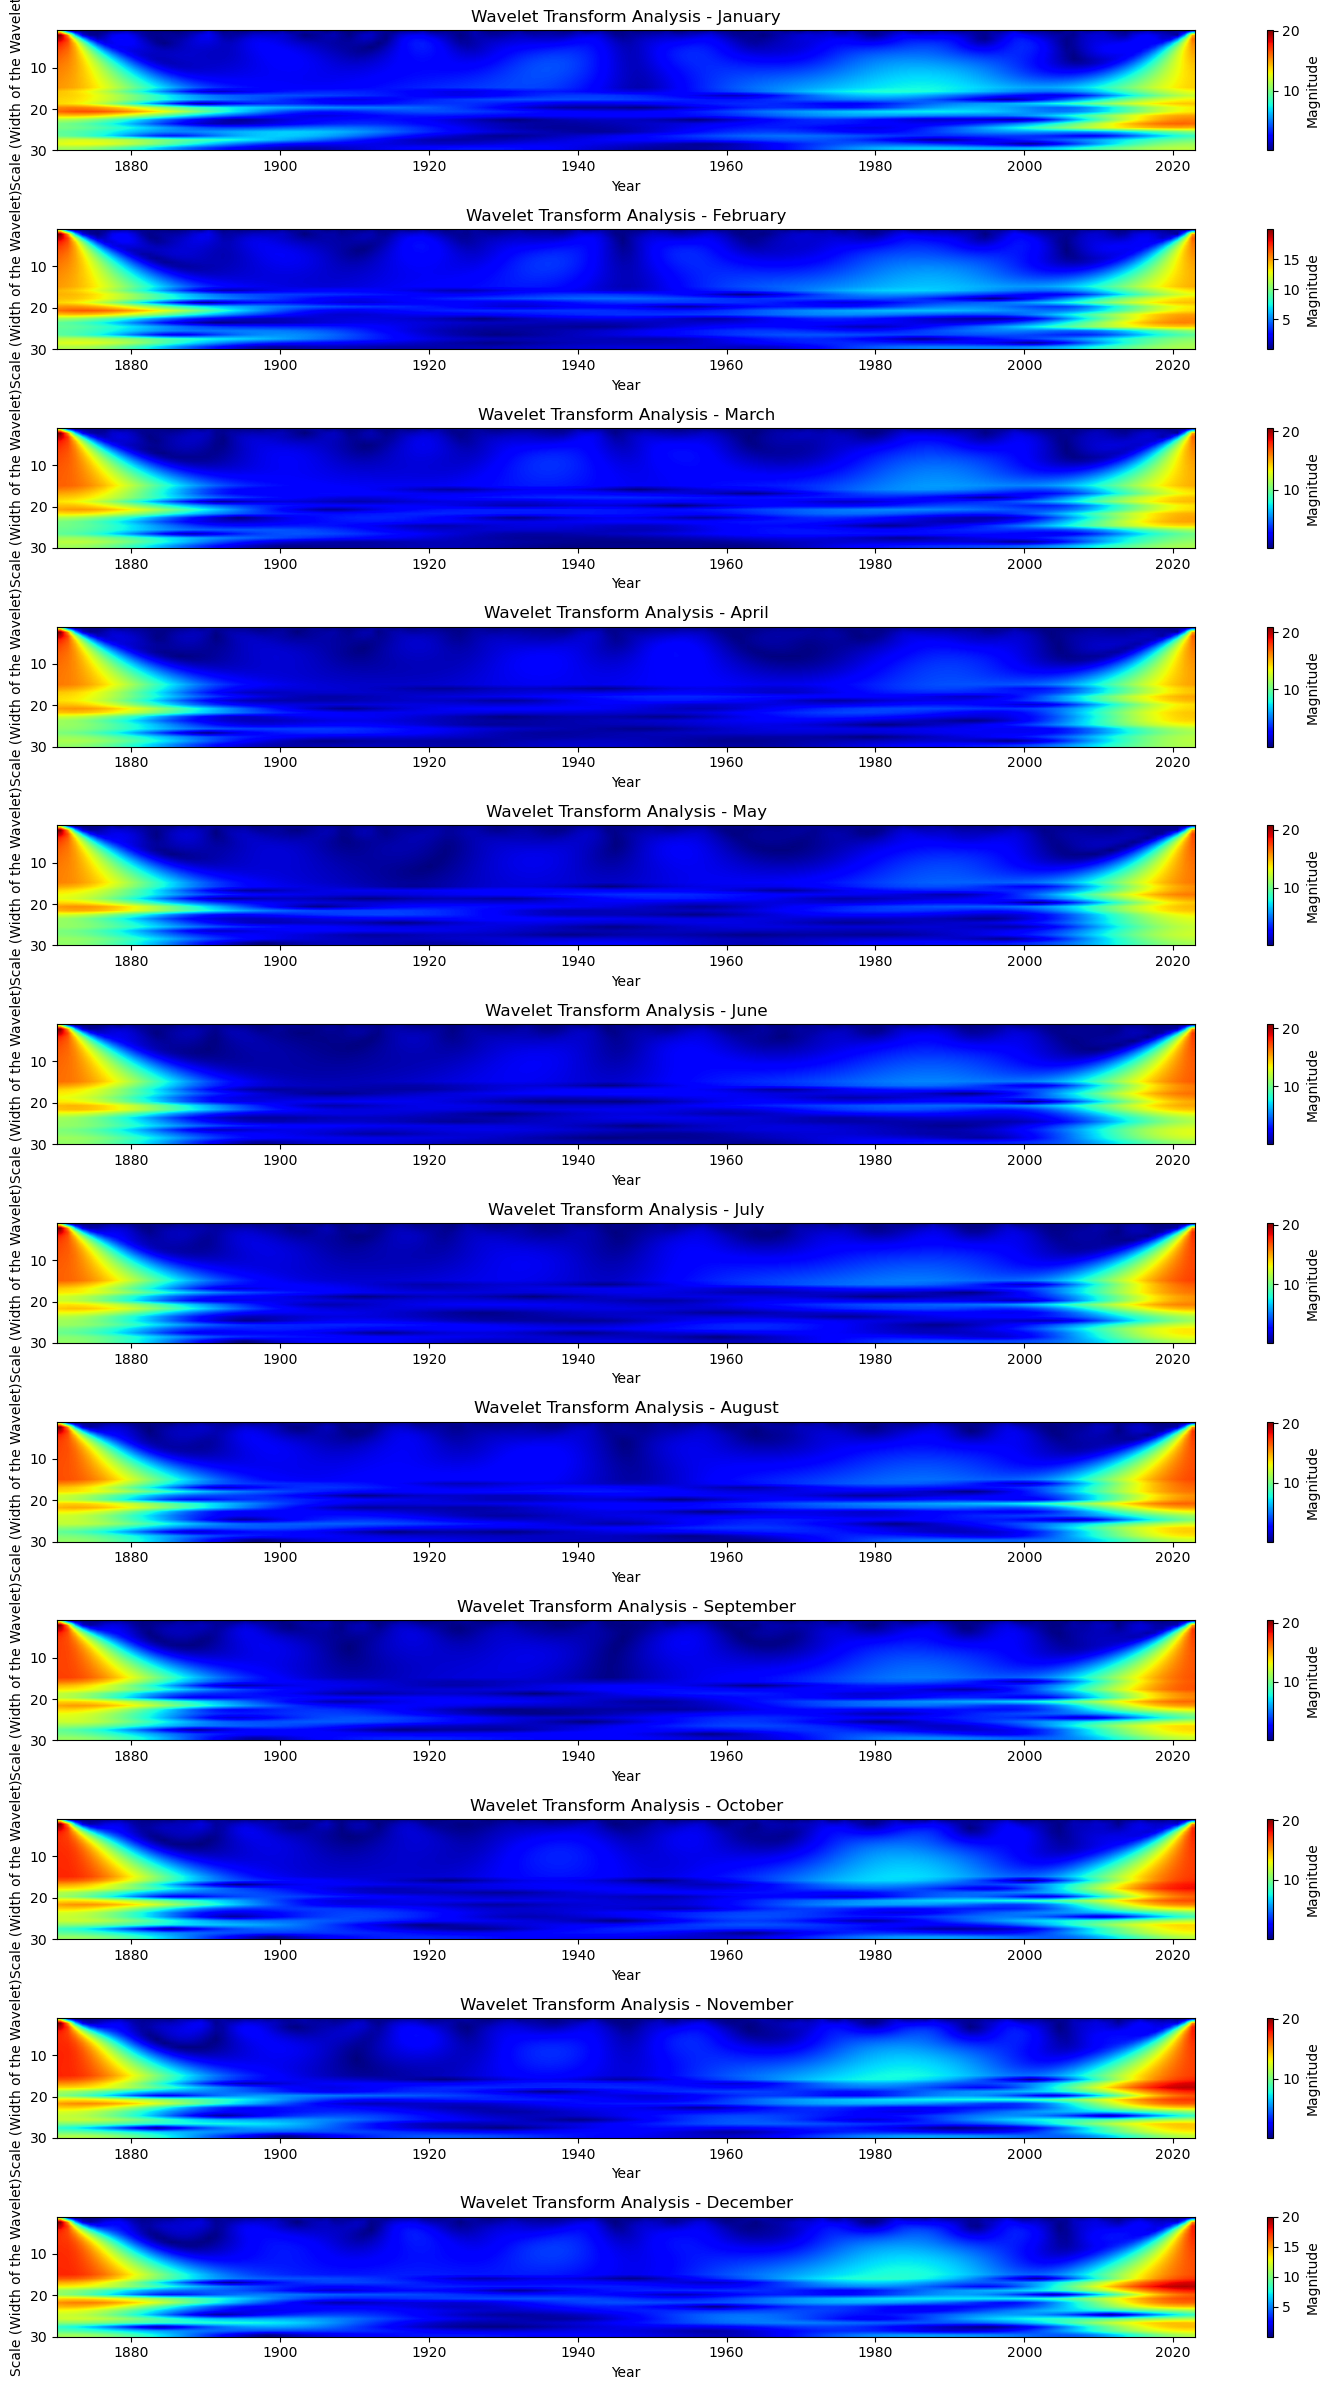

In [31]:
nino_data = df_nino34
sst_columns = nino_data.columns[1:]

# Function for Continuous Wavelet Transform (CWT)
def wavelet_analysis(data, wavelet='cmor', widths=np.arange(1, 31)):
    coeffs = cwt(data, morlet, widths=widths)
    return coeffs

# Perform WT Analysis for each SST column
wavelet_results = {}
for sst_column in sst_columns:
    data = nino_data[sst_column].values
    coeffs = wavelet_analysis(data)
    wavelet_results[sst_column] = coeffs

# Visualize the results
plt.figure(figsize=(15, 2 * len(sst_columns)))
for i, sst_column in enumerate(sst_columns, 1):
    plt.subplot(len(sst_columns), 1, i)
    plt.imshow(np.abs(wavelet_results[sst_column]), aspect='auto', extent=[nino_data['Year'].iloc[0], nino_data['Year'].iloc[-1], 30, 1], cmap='jet', interpolation='bilinear')
    plt.colorbar(label='Magnitude')
    plt.title(f'Wavelet Transform Analysis - {sst_column}')
    plt.xlabel('Year')
    plt.ylabel('Scale (Width of the Wavelet)')

plt.tight_layout()
plt.show()

#### High magnitude in the Continuous Wavelet Transform (CWT) plots around the time period of 1850-1880 suggests that there were significant time-frequency variations or patterns in the Sea Surface Temperature (SST) data during that period.This can be seen by the fact that there were some strong to very strong el nino events.

#### The Red colour on the CWT plot can be possibly due to the Strong El nino events during the time frame. The intensity of the colour decreases with the intensity of such events during those time frame.